# Final Project for AI 221

AI 221 | 1st Sem AY 2024-2025  
Students: Jemima Bian Anila, Joshua Cantor, Michael Spencer Quinto, MEng in AI  
Instructors: Dr. Miguel Remolona | Dr. Jon Dewitt Dalisay

## Dataset

https://data.mendeley.com/datasets/tsvdyhbphs/1

https://www.kaggle.com/datasets/jaydepaolomirandilla/philippine-medicinal-plant-leaf-dataset/data


In [2]:
import sys
from pathlib import Path
  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import torch  
import cv2
import random



%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)

/tmp/ipykernel_3303459/1189830066.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Add project root directory to Python path to allow importing from src folder
notebook_dir = Path("__file__").resolve().parent
project_root = Path.cwd().parent
sys.path.append(str(project_root))

In [4]:
print(torch.cuda.is_available())

True


# Import utility modules from `src` folder

Note: all reusable code like transformations for the dataframes, etc. can be found inside the `src` folder and are imported here for better modularity and version control


In [5]:
from src.utils_data import (
    PROCESSED_DATA_FOLDER,
    HIBISCUS_PROCESSED_FOLDER,
    AVERRHOEA_BILIMBI_PROCESSED_FOLDER,
    BG_REMOVED_DATA_FOLDER,
)

In [6]:
print(PROCESSED_DATA_FOLDER.relative_to(project_root))
print(HIBISCUS_PROCESSED_FOLDER.relative_to(project_root))

data/ph_med_plants_reduced_sizes
data/ph_med_plants_reduced_sizes/1Hibiscus rosa-sinensis(HRS)


# 1. Exploratory Data Analysis


## 1.1 Data Loading and Inspection


In [7]:
# Get list of files in HIBISCUS_PROCESSED_FOLDER
hibiscus_files = list(HIBISCUS_PROCESSED_FOLDER.glob("*.webp"))
hibiscus_files_names = [file.name for file in hibiscus_files]
print(hibiscus_files_names)

['Class1_19.webp', 'Class1_93.webp', 'Class1_3.webp', 'Class1_37.webp', 'Class1_80.webp', 'Class1_17.webp', 'Class1_23.webp', 'Class1_22.webp', 'Class1_25.webp', 'Class1_39.webp', 'Class1_33.webp', 'Class1_95.webp', 'Class1_16.webp', 'Class1_115.webp', 'Class1_49.webp', 'Class1_32.webp', 'Class1_110.webp', 'Class1_108.webp', 'Class1_84.webp', 'Class1_111.webp', 'Class1_116.webp', 'Class1_7.webp', 'Class1_77.webp', 'Class1_69.webp', 'Class1_73.webp', 'Class1_89.webp', 'Class1_63.webp', 'Class1_58.webp', 'Class1_105.webp', 'Class1_18.webp', 'Class1_75.webp', 'Class1_106.webp', 'Class1_112.webp', 'Class1_27.webp', 'Class1_11.webp', 'Class1_52.webp', 'Class1_34.webp', 'Class1_104.webp', 'Class1_35.webp', 'Class1_65.webp', 'Class1_102.webp', 'Class1_76.webp', 'Class1_97.webp', 'Class1_44.webp', 'Class1_72.webp', 'Class1_1.webp', 'Class1_42.webp', 'Class1_38.webp', 'Class1_28.webp', 'Class1_6.webp', 'Class1_30.webp', 'Class1_62.webp', 'Class1_81.webp', 'Class1_96.webp', 'Class1_114.webp', 'C

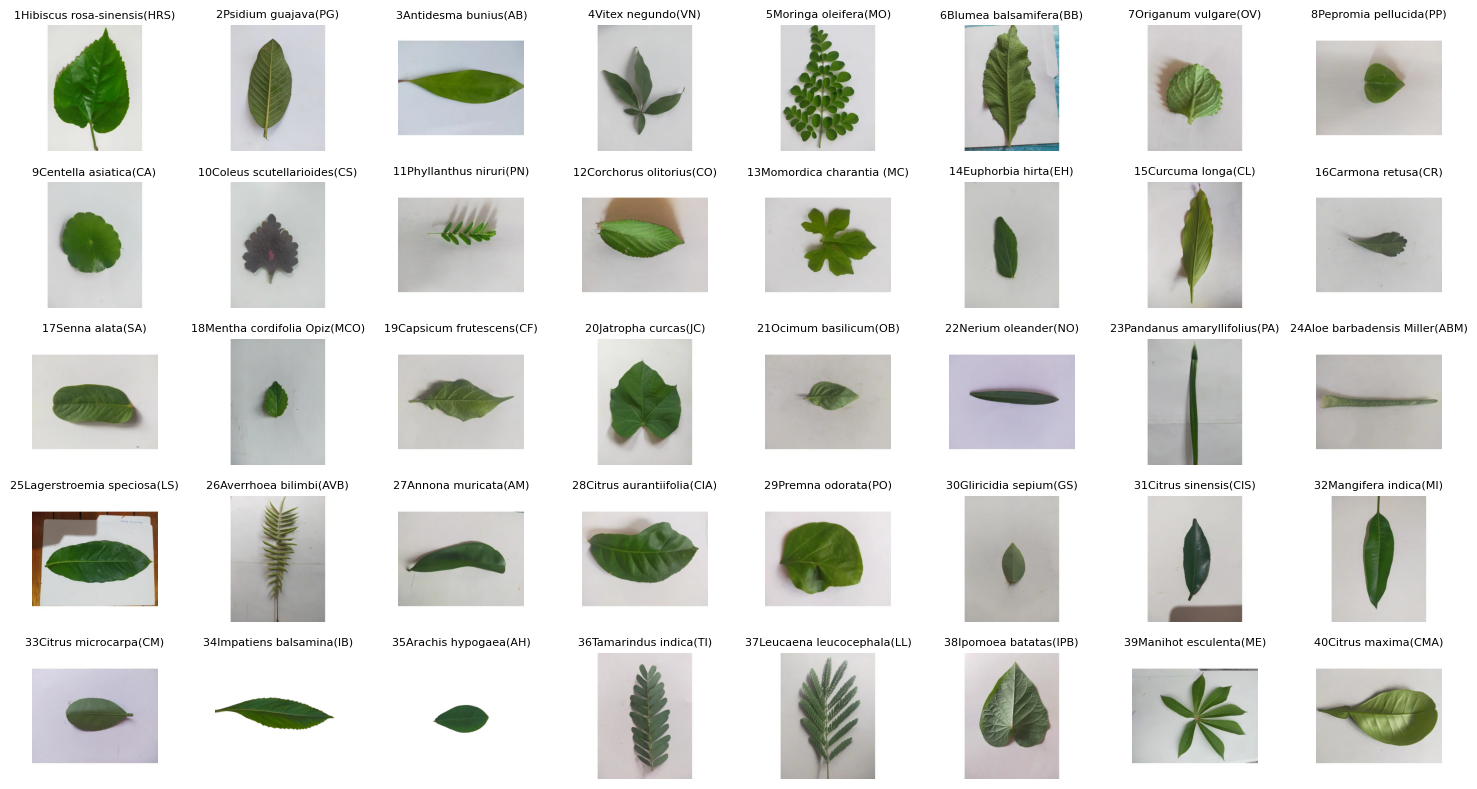

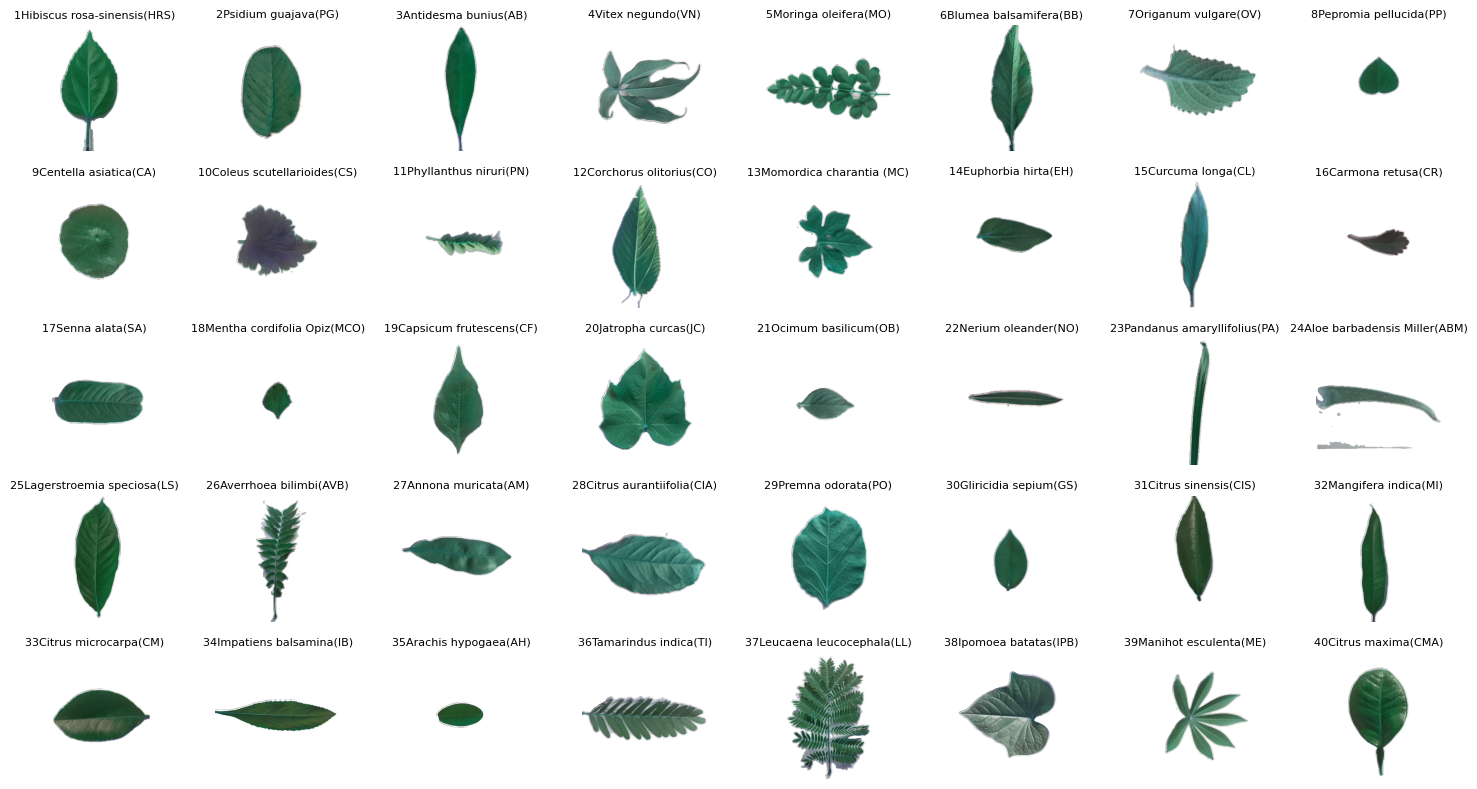

In [8]:
from src.utils_data import (
    plot_random_raw_images_grid,
    class_folders,
    removed_bg_class_folders,
    get_random_images_from_each_class,
    RAW_DATA_DF,
    REMOVED_BG_DATA_DF,
)


# get 1 random image from each class folder (40 images in total)
plot_random_raw_images_grid(class_folders)
plot_random_raw_images_grid(removed_bg_class_folders)

# Testing Feature Extraction


In [14]:
from src.utils_plotting import plot_5x8_grid, plot_images_side_by_side

from src.utils_preprocessing import (
    preprocess_leaf_image,
    extract_texture_features,
    extract_shape_features,
    extract_color_features,
    extract_vein_features,
    extract_all_features,
    create_feature_dataset,
)
from src.utils_plotting import plot_images_with_features

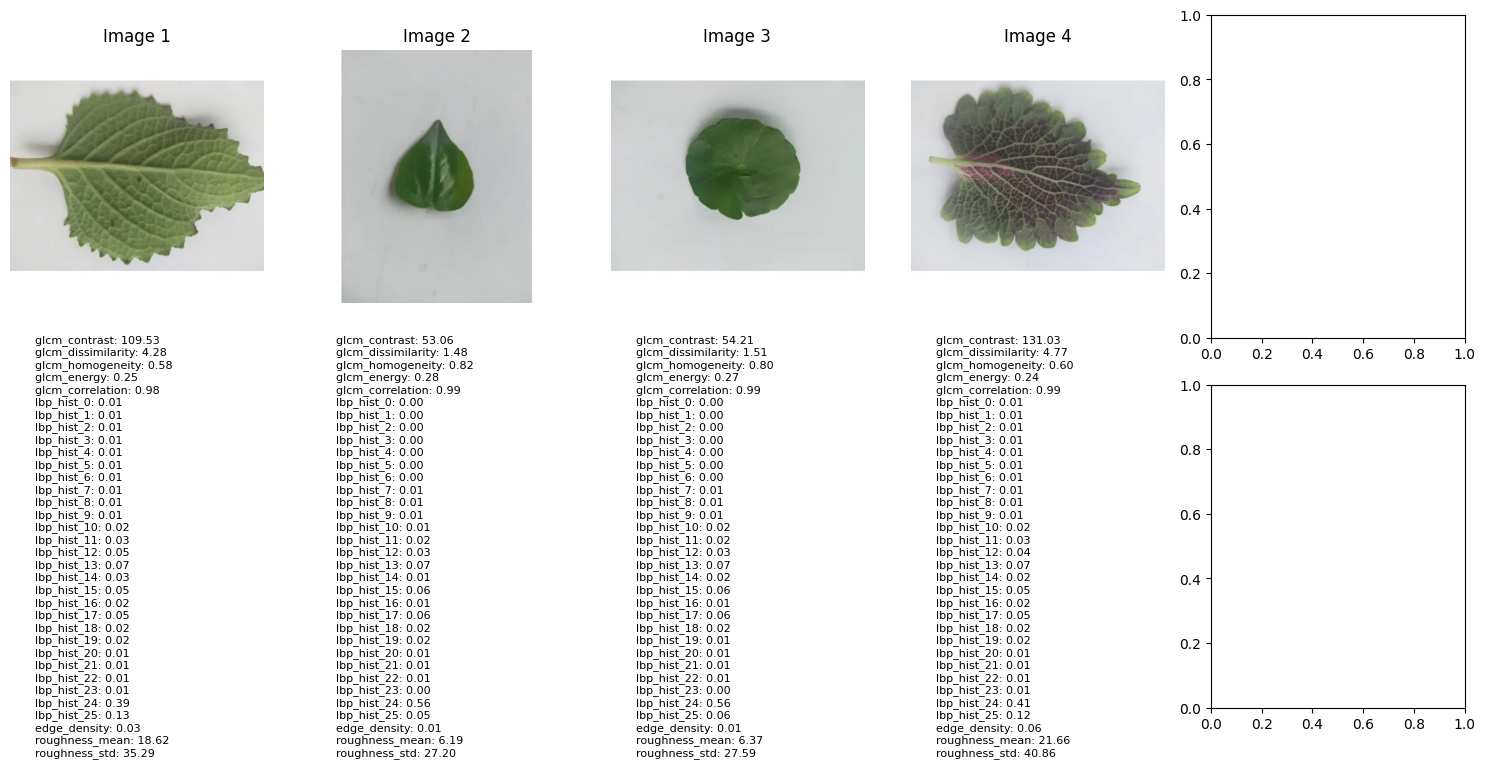

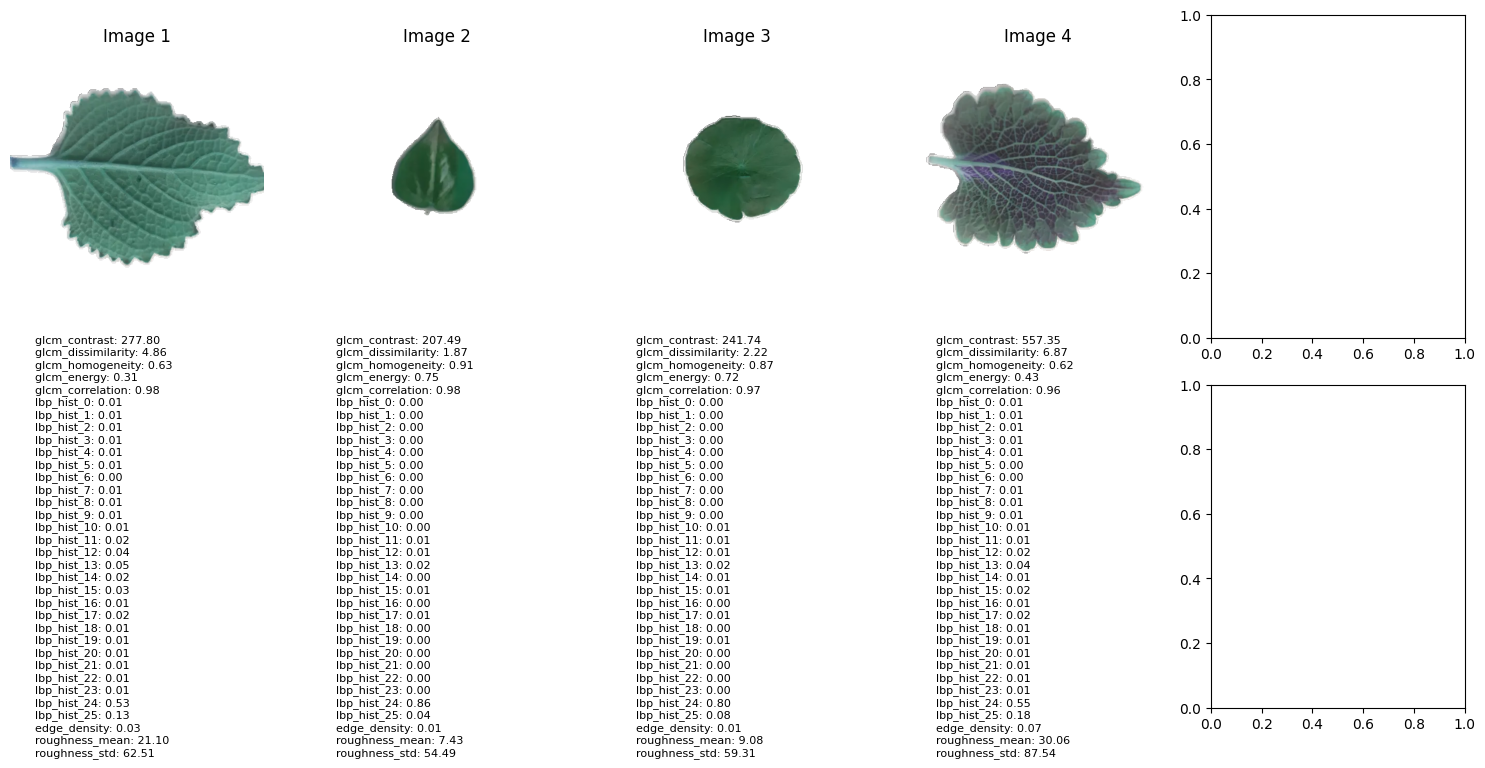

In [34]:
# List of the paths of the 40 random images
random_images_40 = get_random_images_from_each_class(class_folders)
random_images_10 = random_images_40[6:10]

# Get corresponding background removed images by replacing the folder path
bg_rem_random_images_10 = [
    BG_REMOVED_DATA_FOLDER / path.relative_to(PROCESSED_DATA_FOLDER)
    for path in random_images_10
]


texture_features_on_random_images = [
    extract_texture_features(plt.imread(img)) for img in random_images_10
]

texture_features_on_bg_removed_images = [
    extract_texture_features(plt.imread(img)) for img in bg_rem_random_images_10
]

plot_images_with_features(random_images_10, texture_features_on_random_images)
plot_images_with_features(
    bg_rem_random_images_10, texture_features_on_bg_removed_images
)

# Extracting all features


In [53]:
from src.utils_data import ORIGINAL_AND_BG_REMOVED_DATA_DF
from src.utils_preprocessing import extract_all_features, create_feature_dataset

# # Test extracting all features from a single image
# all_features = extract_all_features(random_images_10[0], bg_rem_random_images_10[0])
# display(all_features)
# display(len(all_features))

# Create feature dataset
feature_dataset = create_feature_dataset(ORIGINAL_AND_BG_REMOVED_DATA_DF)
feature_dataset.head()

Processing classes:   0%|          | 0/40 [00:00<?, ?it/s]

processing folder class: 1Hibiscus rosa-sinensis(HRS)
116


Processing classes:   0%|          | 0/40 [00:43<?, ?it/s]


KeyboardInterrupt: 